In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools

fig = plt.figure()    

def plot_linegraph(X):
    plt.plot(X)

def draw_energy(filename, last=int(400*3.25), multiplier=1.0):
    with open('/home/jspringer/Workspace/LCAHalleBerry/output/' + filename) as f:
        lines_energy = f.readlines()
        energy = np.array(list(map(float, [x[:-1] for (_, _, x) in filter(lambda l: len(l) == 3, map(lambda s: s.split(','), lines_energy))][1:])))
        if last is not None:
            plot_linegraph(energy[-last:] * multiplier)
        else:
            plot_linegraph(energy * multiplier)
            

def animate(_):
    fig.clf()
    draw_energy('P1EnergyProbe_batchElement_0.txt', multiplier=1/2)
    draw_energy('V1EnergyProbe_batchElement_0.txt', multiplier=1/20)
    draw_energy('V2EnergyProbe_batchElement_0.txt', multiplier=1/3)
    draw_energy('T1EnergyProbe_batchElement_0.txt', multiplier=1/2)

ani = animation.FuncAnimation(fig, animate, itertools.count(), init_func=lambda: 0,
                              interval=500, blit=True)

In [ ]:
import pvtools as pv
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

data = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/P1ToInputVision.pvp')
values = data['values'][0, 0, 326, ...]
img = (values - np.amin(values)) * (1 / (1e8+np.amax(values)-np.amin(values)))
plt.imshow(img)

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pvtools as pv

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    plt.axis('off')
    fig.axes[0].set_visible(False)
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

data = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/Checkpoints/Checkpoint0664000/P1ToInputVision_W.pvp')
values = data['values']

images = list(map(lambda x: x * 1 / (np.amax(x) + 1e-8), values[0][0]))
# plt.imshow(images[326])
for i in range(512):
    plt.imsave('neurons/' + str(i) + '.png', images[i])
# show_images(images[:], cols=512/4)

In [6]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pvtools as pv
import itertools

def X_nonzero(X):
    return [(num_nonzero(xs)) for xs in np.rollaxis(X, 1)]

def plot_activations(X):
    nonzero = X_nonzero(X)
    X_index = np.arange(len(nonzero))
    plt.bar(X_index, sorted(nonzero))
    
def plot_bargraph(X):
    X_index = np.arange(len(X))
    plt.bar(X_index, sorted(X))
    
def compute_activations(data):
    _, column = data['values'].nonzero()
    activations = np.zeros((data['header']['nf'],))
    for i in column:
        activations[i % len(activations)] += 1
    return activations / (data['header']['nx'] * data['header']['ny'] * data['header']['nbands'])

def plot_linegraph(X):
    plt.plot(X)
    
# data_V1 = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/V1.pvp')
# data_V2 = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/V2.pvp')
# data_T1 = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/T1.pvp')

<IPython.core.display.Javascript object>


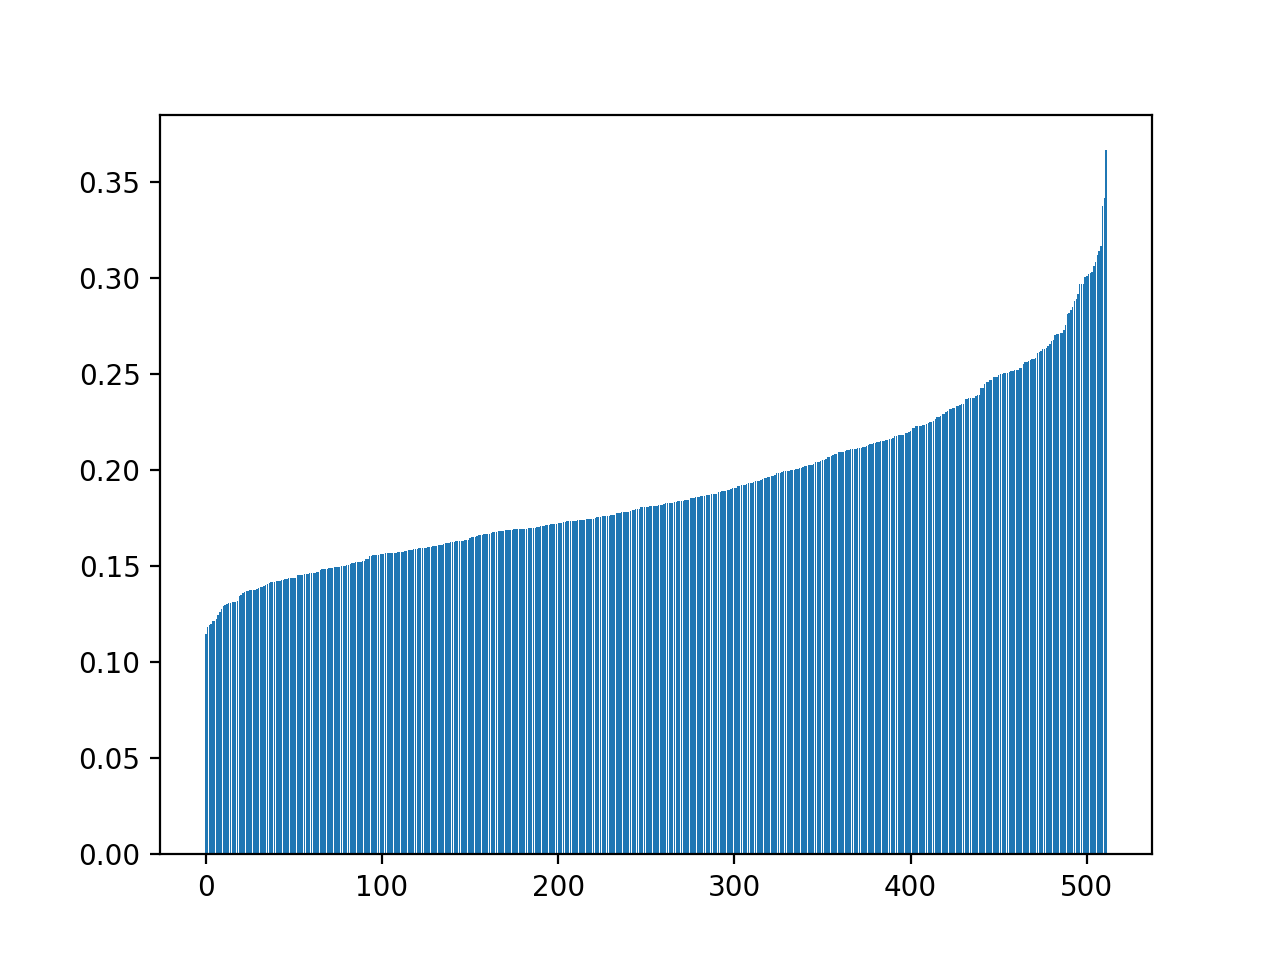

Building frame lookup for sparse pvp file
Done


In [7]:
plt.figure()
data_P1 = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/P1.pvp')
plot_bargraph(compute_activations(data_P1))

In [ ]:
plt.figure()
data_V1 = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output/V1.pvp')
plot_bargraph(compute_activations(data_V1))

<IPython.core.display.Javascript object>

Building frame lookup for sparse pvp file
Done


In [ ]:
plt.figure()
plot_bargraph(compute_activations(data_V2))

In [ ]:
plt.figure()
plot_bargraph(compute_activations(data_T1))